#Download Dataset

In [1]:
!gdown --id 1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l

Downloading...
From: https://drive.google.com/uc?id=1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l
To: /content/dataset.zip
100% 236M/236M [00:01<00:00, 180MB/s]


In [ ]:
!unzip dataset.zip

In [3]:
import pathlib
data_dir = pathlib.Path("./flowers")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


#Load dataset

In [4]:
from PIL import Image
import numpy as np
import os

dataset = []
count = 0
for label in os.listdir("./flowers/"):
  for filename in os.listdir(os.path.join("./flowers/",label)):
    count = count + 1
    print(str(count) + " ---loading " + filename)
    image = Image.open(os.path.join("./flowers/",label,filename))
    image.load()
    image = np.asarray(image, dtype="float32" )
    dataset.append((image, label))

1 ---loading 5923085891_27617463fe.jpg
2 ---loading 3893436870_034b79d118_n.jpg
3 ---loading 6140661443_bb48344226.jpg
4 ---loading 15973657966_d6f6005539_n.jpg
5 ---loading 18843967474_9cb552716b.jpg
6 ---loading 5067864967_19928ca94c_m.jpg
7 ---loading 9483429732_5ae73eb672_n.jpg
8 ---loading 14646279002_9cdf97be97_n.jpg
9 ---loading 45045005_57354ee844.jpg
10 ---loading 3568114325_d6b1363497.jpg
11 ---loading 5923085671_f81dd1cf6f.jpg
12 ---loading 2721638730_34a9b7a78b.jpg
13 ---loading 4160805260_cf758daeae_n.jpg
14 ---loading 3311874685_7b9ef10f7e_m.jpg
15 ---loading 5995136822_8e1eed76f5_n.jpg
16 ---loading 8292914969_4a76608250_m.jpg
17 ---loading 15240466871_ec45b65554_m.jpg
18 ---loading 4848279231_c4960e28b2_n.jpg
19 ---loading 1788133737_b1133d1aa7.jpg
20 ---loading 14646282112_447cc7d1f9.jpg
21 ---loading 3838274225_36010c6254_n.jpg
22 ---loading 4871455214_8b5fb87ab6_n.jpg
23 ---loading 2697194548_ec8f8de97c_n.jpg
24 ---loading 2767658405_1e2043f44c_n.jpg
25 ---loading 47

In [5]:
import random
print(random.sample(dataset, 10))

[(array([[[192., 212., 236.],
        [191., 211., 235.],
        [190., 210., 234.],
        ...,
        [196., 214., 236.],
        [196., 214., 236.],
        [196., 214., 236.]],

       [[192., 212., 236.],
        [191., 211., 235.],
        [190., 210., 234.],
        ...,
        [197., 215., 237.],
        [197., 215., 237.],
        [197., 215., 237.]],

       [[192., 212., 236.],
        [191., 211., 235.],
        [190., 210., 234.],
        ...,
        [197., 215., 237.],
        [197., 215., 237.],
        [197., 215., 237.]],

       ...,

       [[  0.,   5.,   1.],
        [  1.,   8.,   0.],
        [  2.,  10.,   0.],
        ...,
        [203., 220., 238.],
        [203., 220., 240.],
        [202., 218., 241.]],

       [[  0.,   6.,   2.],
        [  1.,   8.,   0.],
        [  3.,  11.,   0.],
        ...,
        [203., 220., 240.],
        [203., 219., 242.],
        [202., 218., 243.]],

       [[  0.,   7.,   0.],
        [  2.,   9.,   1.],
        [  3.,

In [6]:
import random
random.shuffle(dataset)

#Display dataset

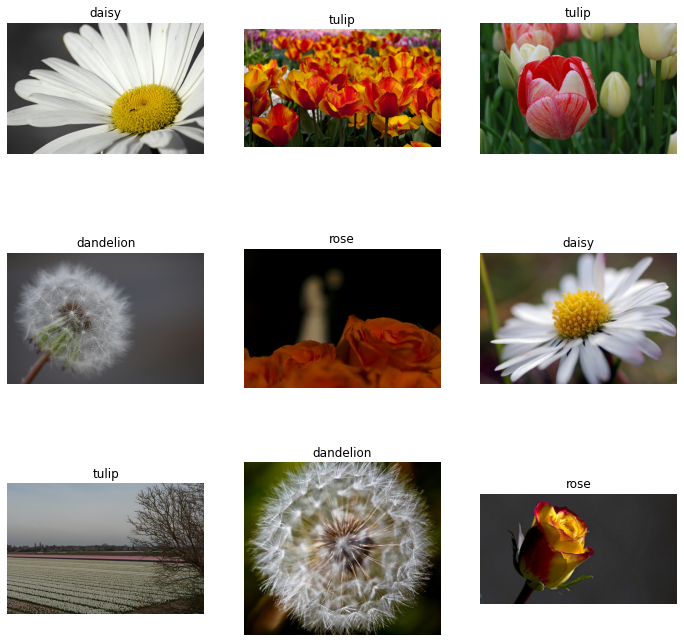

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.imshow(dataset[i][0].astype("int32"))
  ax.axis('off')
  ax.set_title(dataset[i][1])
plt.show()

#Preprocessing

##Resizing

In [8]:
image_size = (32, 32)

In [9]:
import cv2
resized = []
for d in dataset:
  resized.append((cv2.resize(d[0], image_size), d[1]))

In [10]:
dataset = resized

##Reshape

In [11]:
images = np.asarray([d[0] for d in dataset])
print(images.shape)

(4317, 32, 32, 3)


In [12]:
images = images.reshape(len(images), -1)
print(images.shape)

(4317, 3072)


##Normalization

In [13]:
images = images.astype(np.float32) / 255.

#K-Means Clustering

In [14]:
from sklearn.cluster import MiniBatchKMeans
number_clusters = 5
kmeans = MiniBatchKMeans(n_clusters=number_clusters)
kmeans.fit(images)

MiniBatchKMeans(n_clusters=5)

In [15]:
kmeans.labels_

array([0, 2, 1, ..., 3, 2, 3], dtype=int32)

##Map clusters to classes

In [ ]:
def map_clusters_classes(kmeans, classes):
  
  mapping = {}
  
  for i in range(kmeans.n_clusters):
    
    #...
        
  return mapping

def inference(kmeans, images, classes):
  mapping = map_clusters_classes(kmeans, classes)
  clusters = kmeans.predict(images)
  predicted_classes = np.zeros(len(clusters)).astype(np.uint8)
  for i in range(len(clusters)):
    predicted_classes[i] = mapping[clusters[i]]
  return predicted_classes

In [ ]:
labels_classes_mapping = {"daisy":0,"dandelion":1,"rose":2,"sunflower":3,"tulip":4}
classes = [labels_classes_mapping[d[1]] for d in dataset]
classes = np.asarray(classes)
predicted_classes = inference(kmeans, images, classes)
print(predicted_classes[:20])
print(classes[:20])

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(classes, predicted_classes)
print('Accuracy: {}\n'.format(acc))

In [ ]:
number_clusters = [5, 10, 16, 36, 64, 144, 256, 1024, 2048, 4098]
acc_list = []

for n_clusters in number_clusters:
  #...
  print('Accuracy: {}\n'.format(acc))


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(number_clusters, acc_list, label='accuracy', marker='^')
ax.legend(loc='best')
ax.grid('on')
ax.set_title('Accuracy per each cluster number')
plt.show()